In [1]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
from tqdm import tqdm
import tables

import celltypist
from celltypist import models

import muon as mu
from muon import MuData

#os.chdir('/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/')
sc.logging.print_header()

scanpy==1.8.1 anndata==0.8.0 umap==0.3.10 numpy==1.21.2 scipy==1.6.3 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1 leidenalg==0.8.3 pynndescent==0.5.2


In [2]:
adata = sc.read_h5ad('/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/Subset_Tcell_final_soupX_processed_noBatchC_dandelion.1.h5ad')
adata

AnnData object with n_obs × n_vars = 123194 × 3389
    obs: 'ID', 'sample_id', 'donor_id', 'tumour_type', 'age', 'site', 'type', 'mad_prd', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_0.8', 'leiden_1.0', 'leiden_1.0_c14', 'leiden_1.0_c14_C15', 'broad_cell_type', 'leiden_0.8_c22', 'leiden_0.8_c22_c3', 'malignant_call', 'malignant_call_donor', 'malignant_call_tumour_type', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 

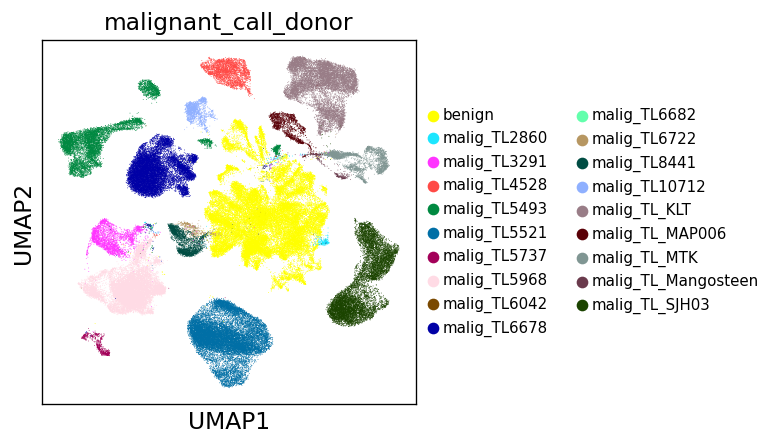

In [3]:
sc.settings.set_figure_params(dpi=60, facecolor='white')
sc.pl.umap(adata, color = ['malignant_call_donor'], legend_fontsize=9)

In [3]:
adata = adata.raw.to_adata()

In [6]:
#adata_sub = adata[adata.obs['malignant_call_donor']=='malig_TL6678'].copy()
adata_sub = adata[adata.obs['donor_id']=='TL6678'].copy()

In [7]:
adata_sub.raw = adata_sub
sc.settings.set_figure_params(dpi=60, facecolor='white')
sc.pp.highly_variable_genes(adata_sub, min_mean=0.0125, max_mean=3, min_disp=0.5)
#sc.pl.highly_variable_genes(adata)

In [8]:
adata_filtered = adata_sub[:, adata_sub.var['highly_variable']]

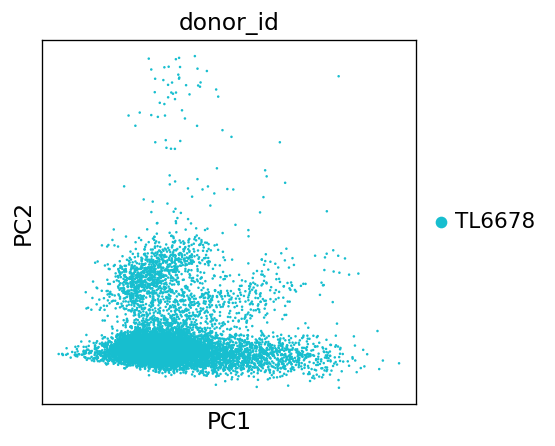

In [9]:
sc.pp.scale(adata_filtered, max_value=10)
sc.tl.pca(adata_filtered, n_comps=50)
sc.pl.pca(adata_filtered, color = ['donor_id'])

In [10]:
sc.pp.neighbors(adata_filtered, n_neighbors=15, n_pcs=50, random_state=123)
sc.tl.umap(adata_filtered, random_state=123)

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-c

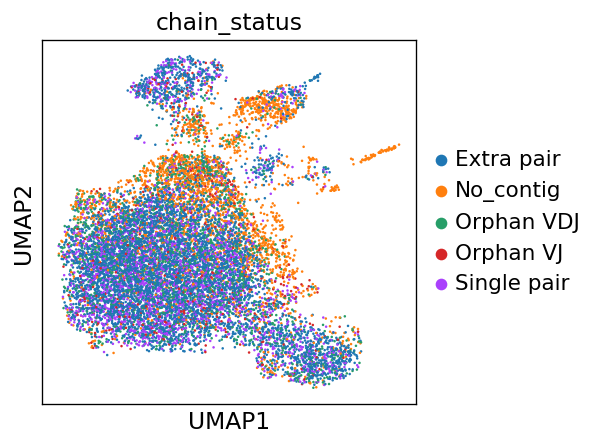

In [4]:
sc.settings.set_figure_params(dpi=60, facecolor='white')
sc.pl.umap(adata_filtered, color=['chain_status'])

In [17]:
save_file = '/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TL6678_umap_mutant_clone.h5ad'
adata_filtered.write(save_file)

In [2]:
adata_filtered = sc.read_h5ad('/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TL6678_umap_mutant_clone.h5ad')
adata_filtered

AnnData object with n_obs × n_vars = 13006 × 4411
    obs: 'ID', 'sample_id', 'donor_id', 'tumour_type', 'age', 'site', 'type', 'mad_prd', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_0.8', 'leiden_1.0', 'leiden_1.0_c14', 'leiden_1.0_c14_C15', 'broad_cell_type', 'leiden_0.8_c22', 'leiden_0.8_c22_c3', 'malignant_call', 'malignant_call_donor', 'malignant_call_tumour_type', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', '

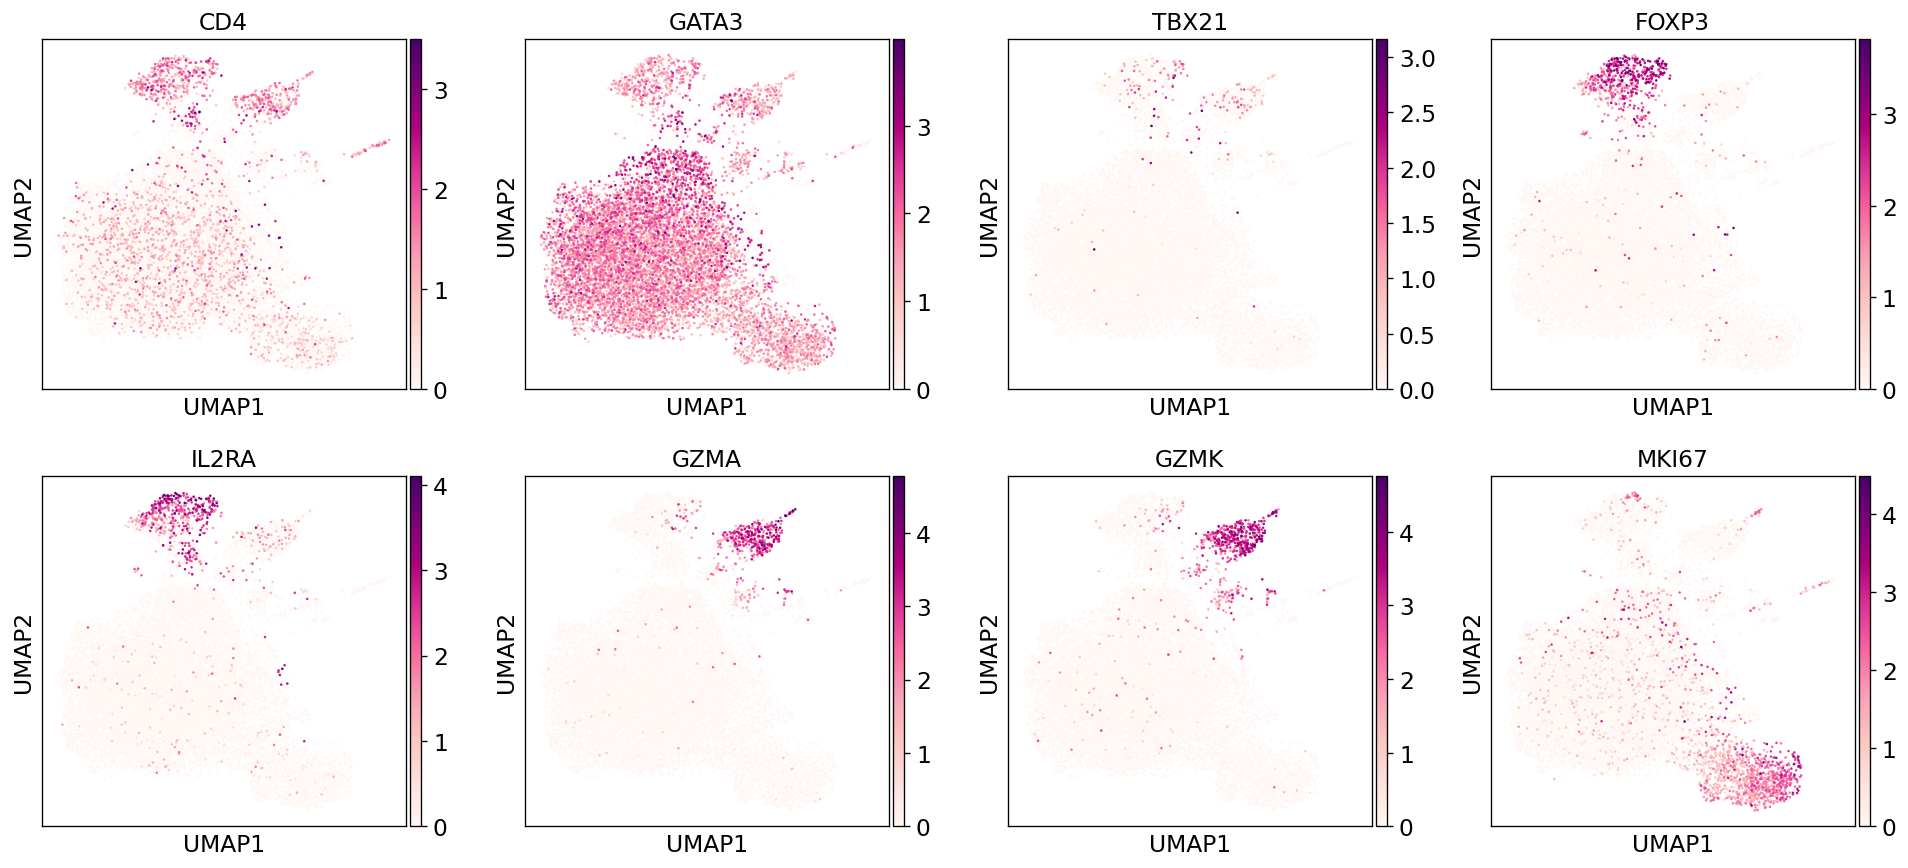

In [13]:
sc.pl.umap(adata_filtered, color=['CD4','GATA3','TBX21','FOXP3','IL2RA','GZMA','GZMK','MKI67'],
           color_map = 'RdPu', save='.pdf')

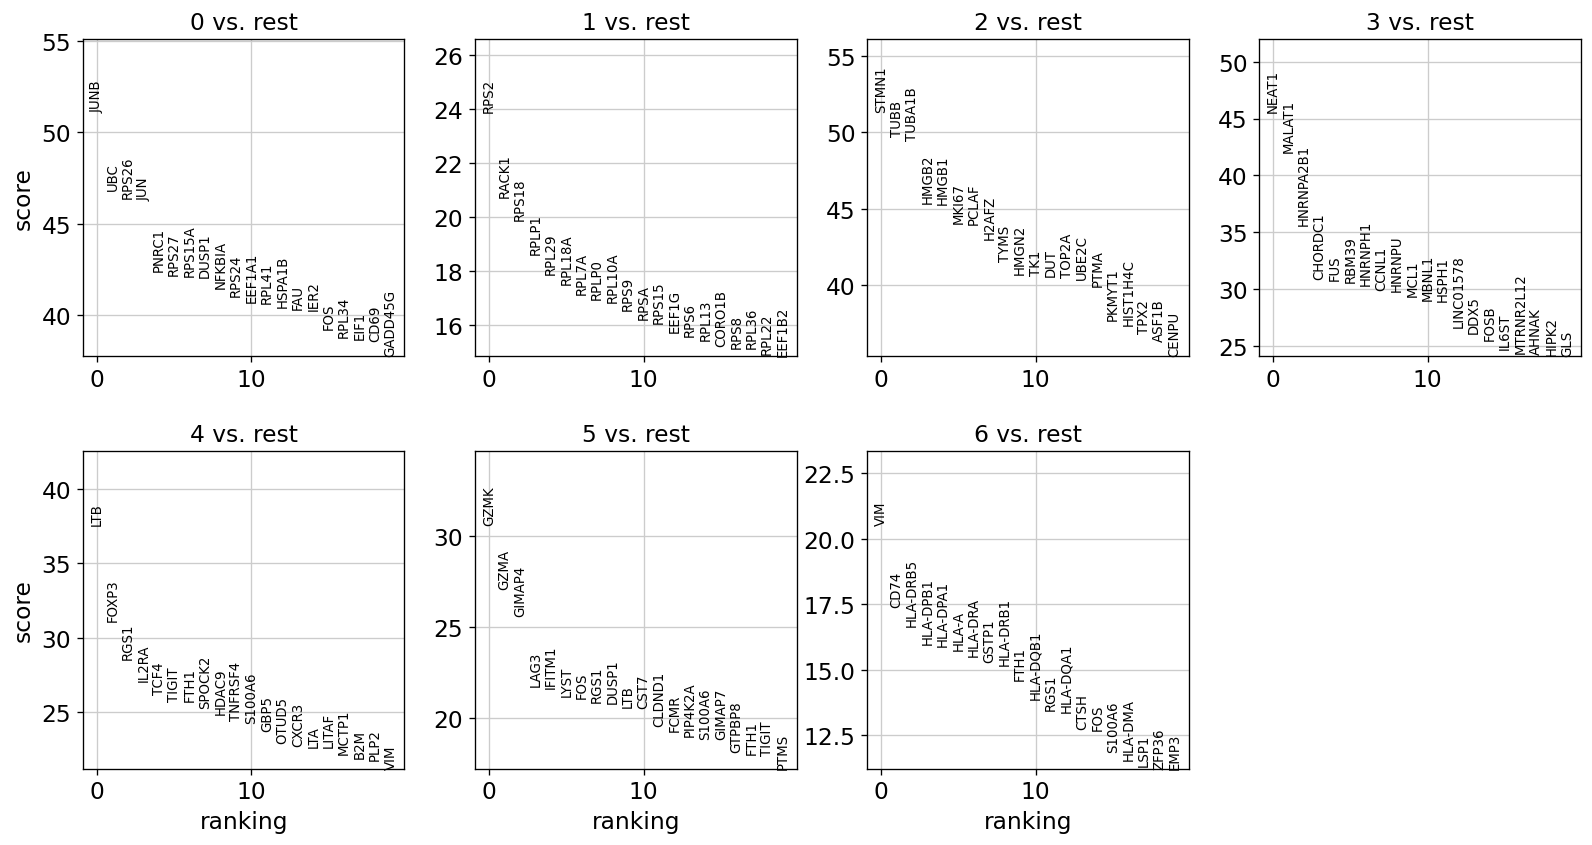

In [40]:
sc.tl.rank_genes_groups(adata_filtered, 'leiden_0.4', method = 'wilcoxon', n_genes = 200, use_raw = True)
sc.pl.rank_genes_groups(adata_filtered, n_genes=20, sharey=False)
result = adata_filtered.uns['rank_genes_groups']
groups = result['names'].dtype.names
markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})

In [14]:
ll = pd.read_csv('../Mutant_clone/TL6678_clone_clust.csv')
ll

,x
AAACCTGCAGCATGAG-1-TL6678_CD3pos_GEX_CITE,C1
AAACCTGGTAATAGCA-1-TL6678_CD3pos_GEX_CITE,C1
AAACGGGTCCCTCAGT-1-TL6678_CD3pos_GEX_CITE,C1
AAAGATGAGTGTACCT-1-TL6678_CD3pos_GEX_CITE,C1
AAAGATGCACGAGGTA-1-TL6678_CD3pos_GEX_CITE,C1
...,...
TTGCCGTGTTAGAACA-1-TL6678_CD3neg_GEX,C4
TTTACTGAGAACAACT-1-TL6678_CD3neg_GEX,C4
TTTCCTCAGTCACGCC-1-TL6678_CD3neg_GEX,C4
TTTGGTTAGACAGAGA-1-TL6678_CD3neg_GEX,C4


In [15]:
adata_filtered.obs['mut_clone'] = ll['x']

... storing 'mut_clone' as categorical


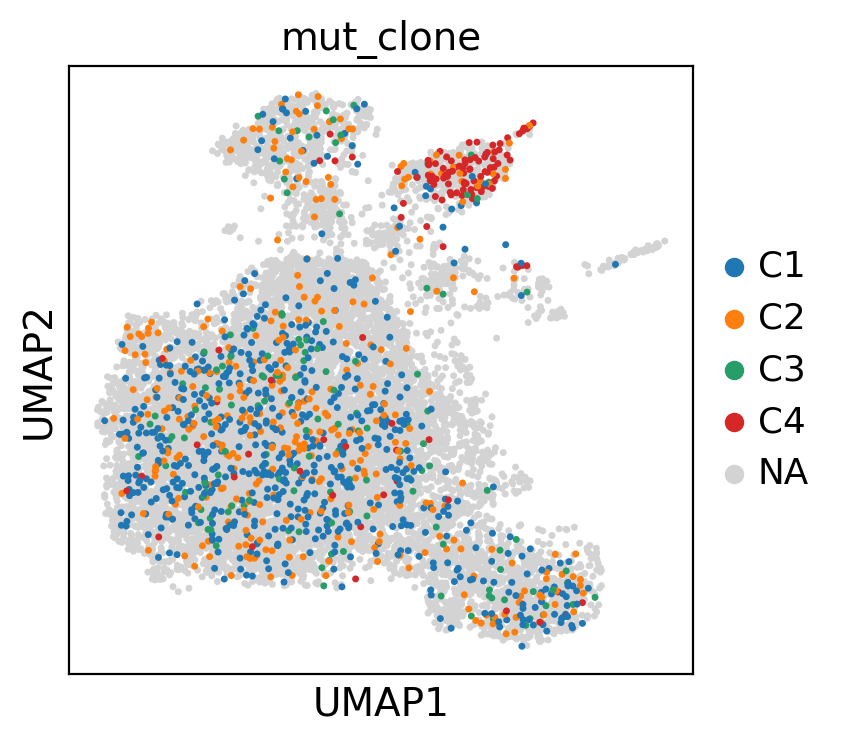

In [16]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata_filtered, color=['mut_clone'], size=25)

In [20]:
sc.tl.embedding_density(adata_filtered, basis='umap', groupby='mut_clone')

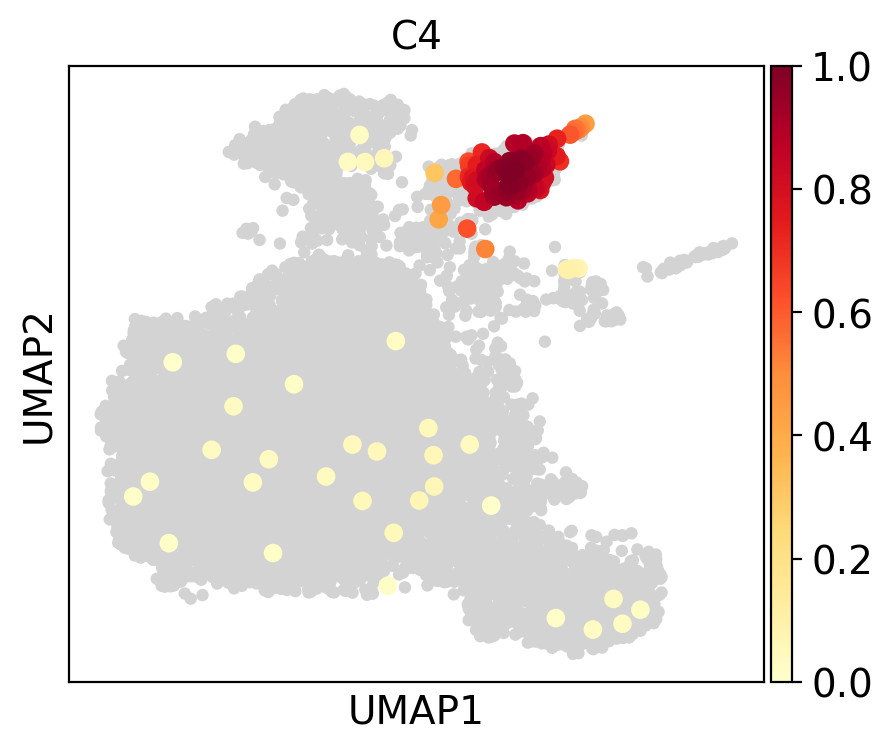

In [31]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.embedding_density(
    adata_filtered, basis='umap', key='umap_density_mut_clone',group='C4',save='.pdf')

In [8]:
ll = pd.read_csv('../Mutant_clone/TL6678_chr1_112703101_C_T.csv')
ll

,Mut
AAACCTGAGACCACGA-1-TL6678_CD3pos_GEX_CITE,0.0
AAACCTGAGCAATATG-1-TL6678_CD3pos_GEX_CITE,NaN
AAACCTGAGCCTTGAT-1-TL6678_CD3pos_GEX_CITE,NaN
AAACCTGAGCGCTCCA-1-TL6678_CD3pos_GEX_CITE,NaN
AAACCTGAGGATCGCA-1-TL6678_CD3pos_GEX_CITE,0.0
...,...
TTTGGTTTCTGCCCTA-1-TL6678_CD3neg_GEX,NaN
TTTGTCAAGAGCAATT-1-TL6678_CD3neg_GEX,1.0
TTTGTCAAGCTAGGCA-1-TL6678_CD3neg_GEX,0.0
TTTGTCACACCCATTC-1-TL6678_CD3neg_GEX,NaN
